In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

- Survived: 0 = no, 1 = yes
- Pclass (Class):1 = 1º, 2 = 2º, 3 = 3º
- Sex: passenger sex
- Age: age in years
- Sibsp: Siblings / Spouses on board
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket: ticket number
- Fare: Fare paid by the passenger
- Cabin: cabin number
- Embarked: departure port (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
import tensorflow as tf

# Data

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [5]:
# train_df = pd.read_csv('../input/titanic/train.csv')

In [6]:
# test_df = pd.read_csv('../input/titanic/test.csv')

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_df.shape

(891, 12)

## Features

In [10]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

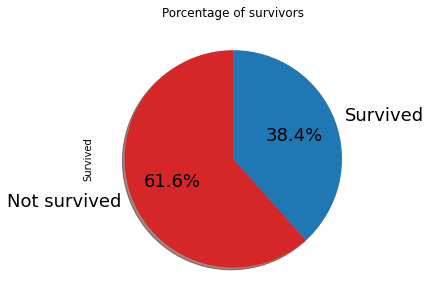

In [14]:
train_df['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'), shadow=True,
                                             labels=('Not survived','Survived'),
                                            figsize=(8,5), startangle=90, autopct='%1.1f%%',
                                            title='Porcentage of survivors', fontsize=18).set_ylabel=('')
plt.show()

### Percentage of survivors in each class:

In [15]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


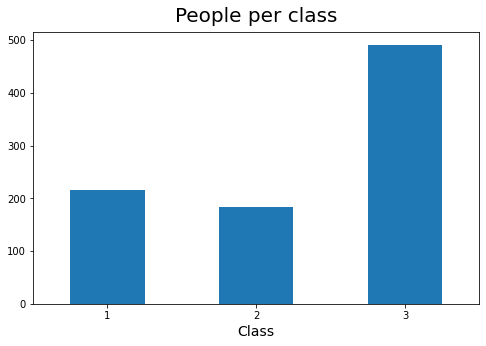

In [16]:
ax = train_df.pivot_table(index='Pclass',values='Name',aggfunc='count').plot(kind='bar', rot=0, legend=None,
                                                                        label='index', figsize=(8,5))

ax.set_xlabel('Class', fontsize = 14)
ax.set_title('People per class', fontsize = 20, pad=10)
plt.show()

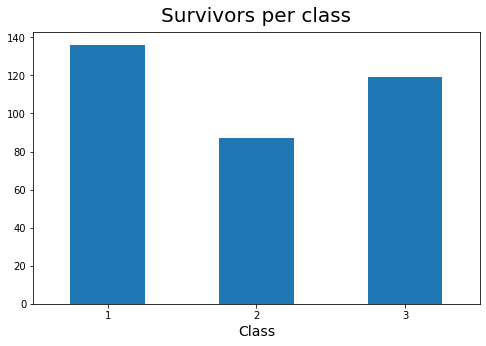

In [17]:
ax = train_df[train_df['Survived'] == 1].groupby('Pclass').sum()['Survived'].plot(kind='bar', rot=0, legend=None,
                                                                        label='index',figsize=(8,5))
ax.set_xlabel('Class', fontsize = 14)
ax.set_title('Survivors per class', fontsize = 20, pad=10)
plt.show()

- Despite having more people in class-3, class-1 had more survivors.

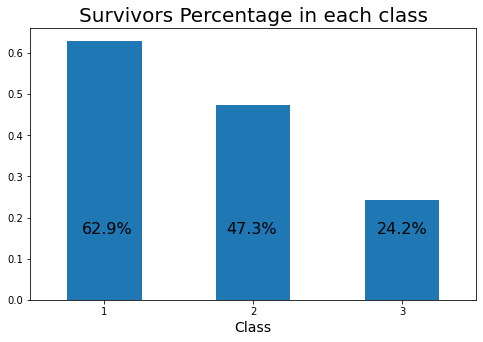

In [18]:
ax = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().set_index('Pclass').plot(kind='bar',
                                                                                                    rot=0,
                                                                                                    legend=None,
                                                                                                    figsize=(8,5))
ax.set_title('Survivors Percentage in each class', fontsize=20)
ax.set_xlabel('Class', fontsize=14)
ax.annotate('62.9%', xy = (-0.15, 0.16), fontsize = 16)
ax.annotate('47.3%', xy = (0.82, 0.16), fontsize = 16)
ax.annotate('24.2%', xy = (1.83, 0.16), fontsize = 16)
plt.show()

### Percentage of survived women and men:

In [19]:
# male and female percentage
train_df['Sex'].value_counts(normalize=True) * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [20]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().set_index('Sex') * 100

,Survived
Sex,
female,74.203822
male,18.890815


In [21]:
train_df.pivot_table('PassengerId', ['Sex'], 'Pclass', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


- We note there is a huge difference between male and female percentage survivors.

### Survivors according the amount of siblings/spouses on board:

In [22]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Survivors according the amount of parents/children on board:

In [23]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Suvivors by age:

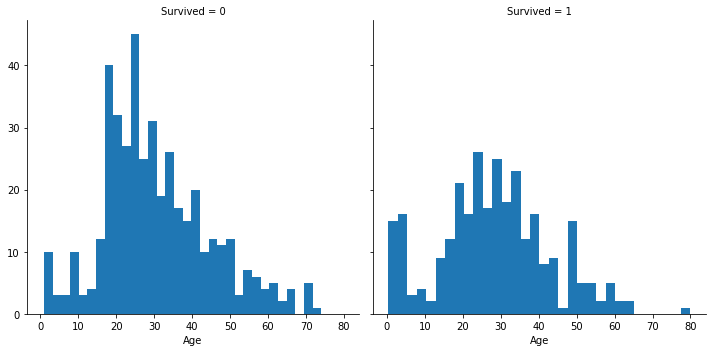

In [24]:
g = sns.FacetGrid(train_df, col='Survived', height=5)
g.map(plt.hist, 'Age', bins=32)
plt.show()

- Most passengers are between 15-35 age;
- Infants - age <=4 - had high survival rate;
- Oldest passengers - age = 80 - survived;
- Large number of 15-25 year olds did not survive.


## Creating new feature 'Title' extracting from existing 'Name':

In [25]:
# extracting 'Title' from the 'Name'
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [26]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- We can replace many titles with a more common name or classify them as 'Rare'.

In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')    

In [28]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Converting the categorical titles to ordinal:

In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## Dropping useless features:

In [31]:
train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

combine = [train_df, test_df]

## Survivors according embarked port:

In [32]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


- There are 2 null value.

In [36]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
# most common
train_df["Embarked"].mode()

0    S
dtype: object

In [38]:
# Filling missing values with most common occurance
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(train_df["Embarked"].mode()[0])

In [39]:
for data in combine:
  data["Embarked"] = data["Embarked"].map({'C': 0, 'Q': 1, 'S':2}).astype(int)

In [40]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,0,0.553571
1,1,0.389610
2,2,0.339009
